<a href="https://colab.research.google.com/github/Mashi007/Sales/blob/Documentos/Ventas_(P1_T3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **1. Instalación de módulos**

---

In [ ]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---
# **2. Importación de librerias**

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
# **3. Marco de datos**

---

In [114]:

# Importar el archivo CSV
df_sales = pd.read_csv("/content/sales_predictions.csv")

# Imprime las primeras filas del DataFrame
df_sales.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


---
# **4. Análisis exploratorio**

---


### 4.1  Estructura de la Matriz

NOTA:
1.  Revisión de cantidad de filas
2.  Revisión de cantidad de columnas



In [115]:
df_sales.shape
print("\033[43m\033[30mEl DataFrame tiene", df_sales.shape[0], "filas y", df_sales.shape[1], "columnas.\033[0m")



El DataFrame tiene 8523 filas y 12 columnas.


---------------------------------------------------------------------

### 4.2  Identificación de duplicados


NOTA:
1.  Revisión primaria de duplicados



In [116]:

# Identificar los duplicados
duplicates = df_sales[df_sales.duplicated()]

# Imprimir los registros duplicados
if len(duplicates) > 0:
    print("\033[43m\033[30mSe encontraron", len(duplicates), "registros duplicados:\033[0m")
    print(duplicates)
else:
    print("\033[43m\033[30mNo se encontraron registros duplicados en el DataFrame.\033[0m")



No se encontraron registros duplicados en el DataFrame.


---------------------------------------------------------------------

NOTA:
1.  Revisión cada variable cateegorica

In [117]:
# VARIABLE "Item_Fat_Content"

from fuzzywuzzy import fuzz
from tabulate import tabulate

# Convertir todos los nombres a minúsculas para compararlos
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].astype(str).str.lower()

# Obtener una lista de nombres únicos
nombres_unicos = df_sales['Item_Fat_Content'].unique()

# Crear un diccionario para almacenar nombres parecidos
nombres_parecidos = {}

# Comparar cada par de nombres únicos y guardar los nombres parecidos
for i, nombre1 in enumerate(nombres_unicos):
    for nombre2 in nombres_unicos[i+1:]:
        similitud = fuzz.token_sort_ratio(nombre1, nombre2)
        if similitud > 90:
            if nombre1 in nombres_parecidos:
                nombres_parecidos[nombre1].append(nombre2)
            else:
                nombres_parecidos[nombre1] = [nombre2]

# Ordenar los nombres alfabéticamente
nombres_unicos_ordenados = sorted(nombres_unicos)

# Imprimir los nombres parecidos en formato de tabla
tabla_nombres = []
for nombre in nombres_unicos_ordenados:
    if nombre in nombres_parecidos:
        tabla_nombres.append([nombre, ', '.join(nombres_parecidos[nombre])])
    else:
        tabla_nombres.append([nombre, ''])

print("\033[43m\033[30mValores similares en la columna 'Item_Fat_Content':\033[0m")
print(tabulate(tabla_nombres, headers=['Nombre', 'Nombres parecidos']))


Valores similares en la columna 'Item_Fat_Content':
Nombre    Nombres parecidos
--------  -------------------
lf
low fat
reg
regular


In [118]:
# VARIABLE "Item_Type"

# Convertir todos los nombres a minúsculas para compararlos
df_sales['Item_Type'] = df_sales['Item_Type'].astype(str).str.lower()

# Obtener una lista de nombres únicos
nombres_unicos = df_sales['Item_Type'].unique()

# Crear un diccionario para almacenar nombres parecidos
nombres_parecidos = {}

# Comparar cada par de nombres únicos y guardar los nombres parecidos
for i, nombre1 in enumerate(nombres_unicos):
    for nombre2 in nombres_unicos[i+1:]:
        similitud = fuzz.token_sort_ratio(nombre1, nombre2)
        if similitud > 90:
            if nombre1 in nombres_parecidos:
                nombres_parecidos[nombre1].append(nombre2)
            else:
                nombres_parecidos[nombre1] = [nombre2]

# Ordenar los nombres alfabéticamente
nombres_unicos_ordenados = sorted(nombres_unicos)

# Imprimir los nombres parecidos en formato de tabla
tabla_nombres = []
for nombre in nombres_unicos_ordenados:
    if nombre in nombres_parecidos:
        tabla_nombres.append([nombre, ', '.join(nombres_parecidos[nombre])])
    else:
        tabla_nombres.append([nombre, ''])

print("\033[43m\033[30mValores similares en la columna 'Item_Fat_Content':\033[0m")
print(tabulate(tabla_nombres, headers=['Nombre', 'Nombres parecidos']))

Valores similares en la columna 'Item_Fat_Content':
Nombre                 Nombres parecidos
---------------------  -------------------
baking goods
breads
breakfast
canned
dairy
frozen foods
fruits and vegetables
hard drinks
health and hygiene
household
meat
others
seafood
snack foods
soft drinks
starchy foods


In [119]:
# VARIABLE "Outlet_Identifier"

# Convertir todos los nombres a minúsculas para compararlos
df_sales['Outlet_Identifier'] = df_sales['Outlet_Identifier'].astype(str).str.lower()

# Obtener una lista de nombres únicos
nombres_unicos = df_sales['Outlet_Identifier'].unique()

# Crear un diccionario para almacenar nombres parecidos
nombres_parecidos = {}

# Comparar cada par de nombres únicos y guardar los nombres parecidos
for i, nombre1 in enumerate(nombres_unicos):
    for nombre2 in nombres_unicos[i+1:]:
        similitud = fuzz.token_sort_ratio(nombre1, nombre2)
        if similitud > 90:
            if nombre1 in nombres_parecidos:
                nombres_parecidos[nombre1].append(nombre2)
            else:
                nombres_parecidos[nombre1] = [nombre2]

# Ordenar los nombres alfabéticamente
nombres_unicos_ordenados = sorted(nombres_unicos)

# Imprimir los nombres parecidos en formato de tabla
tabla_nombres = []
for nombre in nombres_unicos_ordenados:
    if nombre in nombres_parecidos:
        tabla_nombres.append([nombre, ', '.join(nombres_parecidos[nombre])])
    else:
        tabla_nombres.append([nombre, ''])

print("\033[43m\033[30mValores similares en la columna 'Item_Fat_Content':\033[0m")
print(tabulate(tabla_nombres, headers=['Nombre', 'Nombres parecidos']))

Valores similares en la columna 'Item_Fat_Content':
Nombre    Nombres parecidos
--------  -------------------
out010
out013
out017
out018
out019
out027
out035
out045
out046
out049


In [120]:
# VARIABLE "Outlet_Size"

# Convertir todos los nombres a minúsculas para compararlos
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].astype(str).str.lower()

# Obtener una lista de nombres únicos
nombres_unicos = df_sales['Outlet_Size'].unique()

# Crear un diccionario para almacenar nombres parecidos
nombres_parecidos = {}

# Comparar cada par de nombres únicos y guardar los nombres parecidos
for i, nombre1 in enumerate(nombres_unicos):
    for nombre2 in nombres_unicos[i+1:]:
        similitud = fuzz.token_sort_ratio(nombre1, nombre2)
        if similitud > 90:
            if nombre1 in nombres_parecidos:
                nombres_parecidos[nombre1].append(nombre2)
            else:
                nombres_parecidos[nombre1] = [nombre2]

# Ordenar los nombres alfabéticamente
nombres_unicos_ordenados = sorted(nombres_unicos)

# Imprimir los nombres parecidos en formato de tabla
tabla_nombres = []
for nombre in nombres_unicos_ordenados:
    if nombre in nombres_parecidos:
        tabla_nombres.append([nombre, ', '.join(nombres_parecidos[nombre])])
    else:
        tabla_nombres.append([nombre, ''])

print("\033[43m\033[30mValores similares en la columna 'Item_Fat_Content':\033[0m")
print(tabulate(tabla_nombres, headers=['Nombre', 'Nombres parecidos']))

Valores similares en la columna 'Item_Fat_Content':
Nombre    Nombres parecidos
--------  -------------------
high
medium
nan
small


In [121]:
# VARIABLE "Outlet_Type"

# Convertir todos los nombres a minúsculas para compararlos
df_sales['Outlet_Type'] = df_sales['Outlet_Type'].astype(str).str.lower()

# Obtener una lista de nombres únicos
nombres_unicos = df_sales['Outlet_Type'].unique()

# Crear un diccionario para almacenar nombres parecidos
nombres_parecidos = {}

# Comparar cada par de nombres únicos y guardar los nombres parecidos
for i, nombre1 in enumerate(nombres_unicos):
    for nombre2 in nombres_unicos[i+1:]:
        similitud = fuzz.token_sort_ratio(nombre1, nombre2)
        if similitud > 90:
            if nombre1 in nombres_parecidos:
                nombres_parecidos[nombre1].append(nombre2)
            else:
                nombres_parecidos[nombre1] = [nombre2]

# Ordenar los nombres alfabéticamente
nombres_unicos_ordenados = sorted(nombres_unicos)

# Imprimir los nombres parecidos en formato de tabla
tabla_nombres = []
for nombre in nombres_unicos_ordenados:
    if nombre in nombres_parecidos:
        tabla_nombres.append([nombre, ', '.join(nombres_parecidos[nombre])])
    else:
        tabla_nombres.append([nombre, ''])

print("\033[43m\033[30mValores similares en la columna 'Item_Fat_Content':\033[0m")
print(tabulate(tabla_nombres, headers=['Nombre', 'Nombres parecidos']))

Valores similares en la columna 'Item_Fat_Content':
Nombre             Nombres parecidos
-----------------  ------------------------------------
grocery store
supermarket type1  supermarket type2, supermarket type3
supermarket type2  supermarket type3
supermarket type3


---------------------------------------------------------------------

### 4.3  Identificación Dtype por variable

NOTA:

1.   Todas las variables corresponden a la naturaleza requerida, es decir, son numeros u objetos de manera correspondiente. 
2.   Se debe analizar las variables Item_Weight (7060 datos) y Outlet_Size (6113 datos), porque no tienen el total posible de referencias, dado que el total de la matriz es 8523

In [122]:
df_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


---------------------------------------------------------------------

### 4.4  Identificación de celdas null

NOTA:

1.   Identificación de celdas vacías
2.   Análisis de posibilidades de imputación de datos


In [123]:
df_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

---------------------------------------------------------------------

### 4.5  Imputación de variables

NOTA:

1.   Segun la columna Item_Identifier, se puede llenar las celdas vacias ya que los ID de cada producto tiene un peso comun que puede ser usado

In [169]:

# Calcular la media de "Item_Weight" para cada valor único de "Item_Identifier"
item_weight_mean = df_sales.groupby("Item_Identifier")["Item_Weight"].mean()

# Iterar sobre el DataFrame y reemplazar los valores nulos en la columna "Item_Weight"
for idx, row in df_sales.iterrows():
    if pd.isnull(row["Item_Weight"]):
        df_sales.at[idx, "Item_Weight"] = item_weight_mean[row["Item_Identifier"]]
        print(f"Valor nulo encontrado en fila {idx}. Reemplazado con valor medio {item_weight_mean[row['Item_Identifier']]:.2f}.")

# Escribir el DataFrame actualizado en un archivo CSV
df_sales.to_csv("/content/sales_predictions.csv", index=False)
print("Archivo 'sales_predictions_updated.csv' guardado con éxito.")



Valor nulo encontrado en fila 927. Reemplazado con valor medio nan.
Valor nulo encontrado en fila 1922. Reemplazado con valor medio nan.
Valor nulo encontrado en fila 4187. Reemplazado con valor medio nan.
Valor nulo encontrado en fila 5022. Reemplazado con valor medio nan.
Archivo 'sales_predictions_updated.csv' guardado con éxito.


---------------------------------------------------------------------

NOTA:

1.   Posterior a aplicar criterio se comprueba que hay 4 filas con ID de producto que no cuentan con patron de peso extrapolable. Por lo que al ser 4 filas se elimina



In [170]:
# Comprobación de celdas null
df_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [171]:
# Convertir valores "Small", "Medium" y "High" a valores numéricos
df_sales["Outlet_Size"].replace({"Small": 1, "Medium": 2, "High": 3}, inplace=True)

# Calcular la media de "Outlet_Size" para cada valor único de "Outlet_Location_Type"
Outlet_Size_mean = df_sales.groupby("Outlet_Location_Type")["Outlet_Size"].mean()

# Iterar sobre el DataFrame y reemplazar los valores nulos en la columna "Outlet_Size"
for idx, row in df_sales.iterrows():
    if pd.isnull(row["Outlet_Size"]) and row["Outlet_Location_Type"] in ["Tier 1", "Tier 2", "Tier 3"]:
        df_sales.at[idx, "Outlet_Size"] = Outlet_Size_mean[row["Outlet_Location_Type"]]

# Convertir valores numéricos a "Small", "Medium" y "High"
df_sales["Outlet_Size"].replace({1: "Small", 2: "Medium", 3: "High"}, inplace=True)

# Escribir el DataFrame actualizado en un archivo CSV
df_sales.to_csv("/content/sales_predictions.csv", index=False)
print("Archivo 'sales_data_updated.csv' guardado con éxito.")





Archivo 'sales_data_updated.csv' guardado con éxito.


In [172]:
# Comprobación de celdas null
df_sales.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [173]:
# Identificación de casos
null_values = df_sales["Item_Weight"].isnull()
print(null_values)


0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool


---------------------------------------------------------------------

NOTA:

1.   unificación de textos

In [174]:
df_sales["Item_Fat_Content"] = df_sales["Item_Fat_Content"].replace(["LF", "low fat"], "Low Fat")


In [175]:
df_sales["Item_Fat_Content"] = df_sales["Item_Fat_Content"].replace("reg", "Regular")

---------------------------------------------------------------------

NOTA:

1.   Eliminación de 4 filas

In [180]:
# Cargar los datos en un DataFrame
df_sales = pd.read_csv("/content/sales_predictions.csv")

# Eliminar las filas con valores nulos en la columna "Item_Weight"
df_sales = df_sales.dropna(subset=["Item_Weight"])

# Escribir el DataFrame actualizado en un archivo CSV
df_sales.to_csv("/content/sales_predictions.csv", index=False)

# Imprimir el DataFrame actualizado
print(df_sales.head())



  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year       Outlet_Size Outlet_Location_Type  \
0                       1999            Medium               Tier 1   
1                       2009            Medium               Tier 3   
2                       1999            M

---------------------------------------------------------------------

NOTA:

1.   Cambio 56 \celdas "LF" por "Low Fat" y 117 "reg" por "Regular"

In [181]:

# Cargar los datos actualizados en un nuevo DataFrame
df_sales_actualizado = pd.read_sql_query('SELECT * FROM sales_predictions', conn)

# Contar el número de cambios en cada columna
num_changes = df_sales_actualizado[["Item_Fat_Content"]].isin({"LF": "Low Fat", "reg": "Regular"}).sum()

# Imprimir el número de cambios
print("Número de cambios:")
print(num_changes)


Número de cambios:
Item_Fat_Content    0
dtype: int64


---
# **5. Análisis descriptivo**

---


### 5.1  Análisis de medidas de tendencia central

NOTA:

1.   Las variables Item_Visibility, Item_MRP e Item_Outlet_Sales, presentan variaciones muy dispersas. Entre 4 y 7 desviaciones estandar de cada 10 analizadas se alejan del promedio. 
2.   Esto nos puede dar a entender que la dispersión de datos es alta, sin embargo,dado que son productos de diferentes caracteristicas se anota que este analisis se debe realizarse por item. Dado nuestro objetivo de analisis de ventas es necesario analizar la correlación de las variables para entender la varianza.

In [182]:
df_sales.describe().round(2)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.00,8519.00,8519.00,8519.00,8519.00
mean,12.88,0.07,141.01,1997.84,2181.19
std,4.65,0.05,62.28,8.37,1706.51
min,4.56,0.00,31.29,1985.00,33.29
25%,8.78,0.03,93.84,1987.00,834.25
50%,12.65,0.05,143.05,1999.00,1794.33
75%,16.85,0.09,185.68,2004.00,3100.63
max,21.35,0.33,266.89,2009.00,13086.96


In [183]:
import numpy as np

# Seleccionar solo las columnas numéricas
df_numeric = df_sales.select_dtypes(include=np.number)

# Calcular la desviación estándar y el promedio solo en las columnas numéricas
desv_std = df_numeric.std().tolist()
promedio = df_numeric.mean().tolist()

# Calcular el resultado y redondearlo a 2 decimales
resultado = [(a / b) * 100 for a, b in zip(desv_std, promedio)]
resultado = [round(x, 2) for x in resultado]

# Crear un DataFrame con el resultado y mostrarlo
tabla = pd.DataFrame({"Varianza (%)": resultado}, index=df_numeric.columns)
print(tabla)


                           Varianza (%)
Item_Weight                       36.09
Item_Visibility                   78.03
Item_MRP                          44.17
Outlet_Establishment_Year          0.42
Item_Outlet_Sales                 78.24


---------------------------------------------------------------------

### 5.2  Visualización de dispersión de datos

NOTA:

1.   Clasificación de variables numericas y categoricas

In [184]:
numerical_features = ["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"]

In [185]:
categorical_features = ["Item_Identifier", "Item_Fat_Content", "Item_Type", "Item_MRP", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

In [186]:
numerical_features
["Item_Weight", 
 "Item_Visibility", 
 "Item_MRP", 
 "Outlet_Establishment_Year", 
 "Item_Outlet_Sales"]

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [187]:
categorical_features 
["Item_Identifier", 
 "Item_Fat_Content", 
 "Item_Type", 
 "Item_MRP", 
 "Outlet_Identifier", 
 "Outlet_Size", 
 "Outlet_Location_Type", 
 "Outlet_Type"]

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

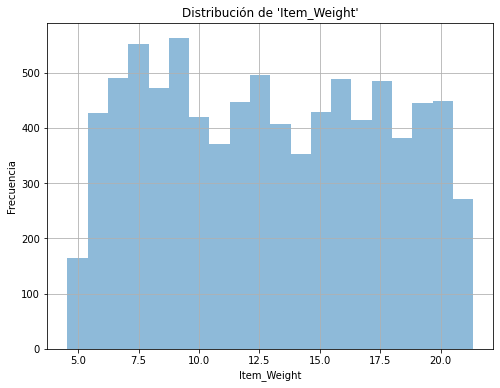

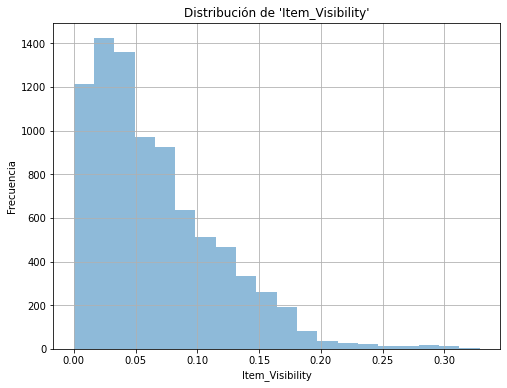

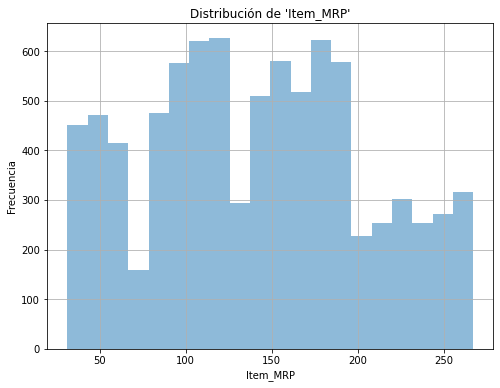

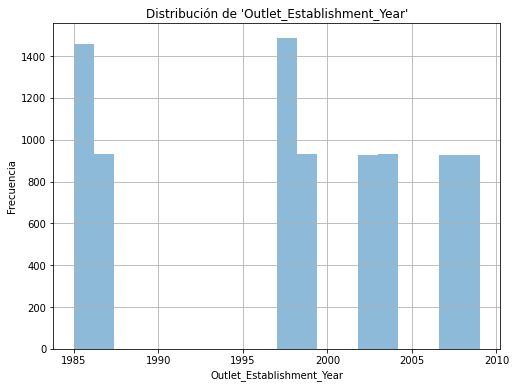

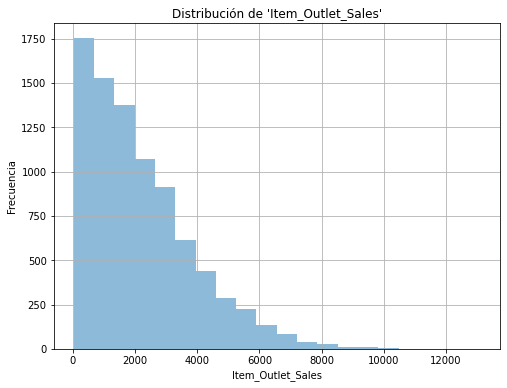

In [188]:

# Crear una función para describir características numéricas con histogramas
def desc_num_feature(df, feature_name):
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 6)
    df[feature_name].hist(bins=20, alpha=0.5, ax=ax)
    ax.set_xlabel(feature_name)
    ax.set_ylabel("Frecuencia")
    ax.set_title(f"Distribución de '{feature_name}'")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()

# Iterar a través de la lista de nombres de características numéricas y llamar a la función desc_num_feature para cada una
for feature_name in numerical_features:
    desc_num_feature(df_sales, feature_name)



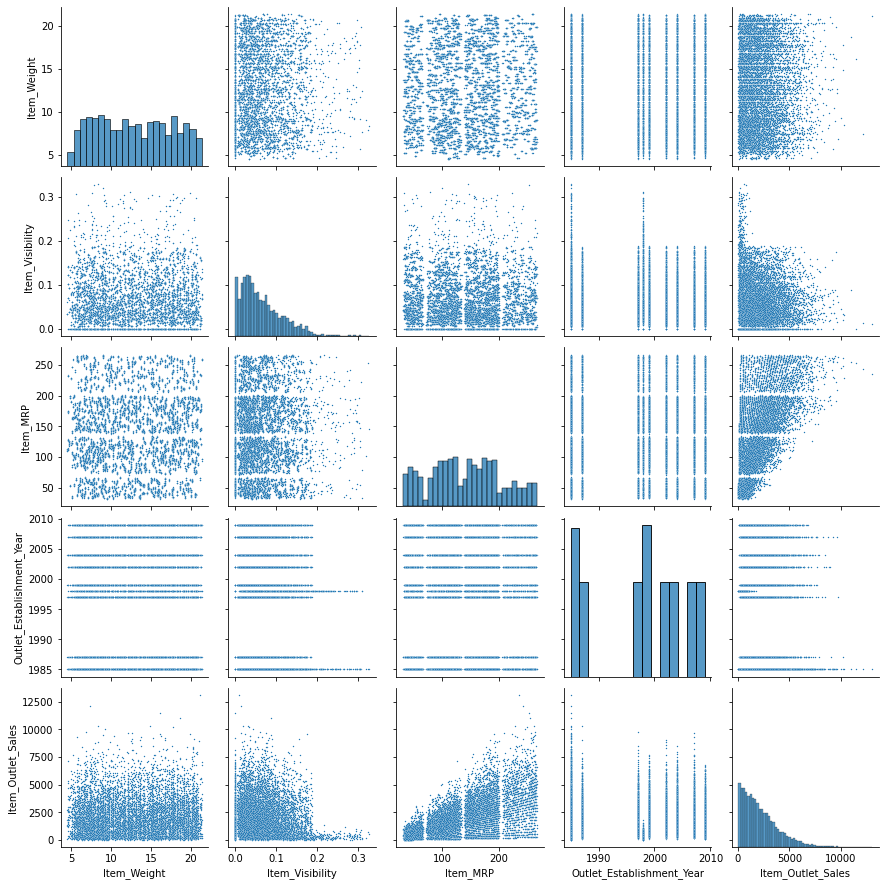

In [189]:
sns.pairplot(df_sales[numerical_features], plot_kws={"s": 2})
plt.show()


---------------------------------------------------------------------

### 5.3  Correlación

NOTA:

1.   Explica para efectos de análisis estrategico cual de las variables influencia con su corelación directa o inversa los resultados esperados, que para objeto de este análisis se prioriza las ventas. Así se puede ver que hay 2 variables tiene relación media y directa (r=0.57). El nivel de ventas (Item_Outlet_Sales) varia en la medida que se gestione adecuadamente Precio máximo de venta al público (precio de catálogo) del producto (Item_MRP).

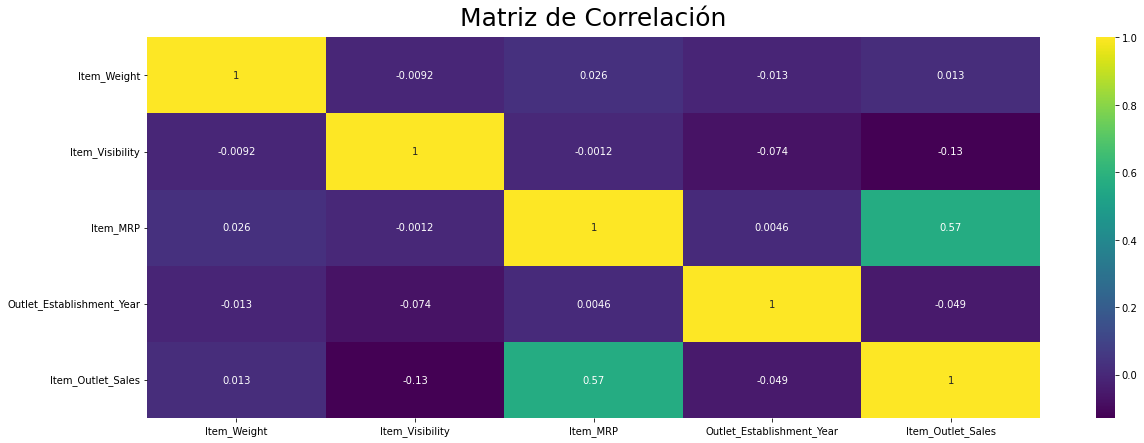

In [190]:
plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(df_sales.corr(), cmap="viridis", annot=True)
heatmap.set_title("Matriz de Correlación", fontdict={"fontsize": 25}, pad=12)
plt.show()


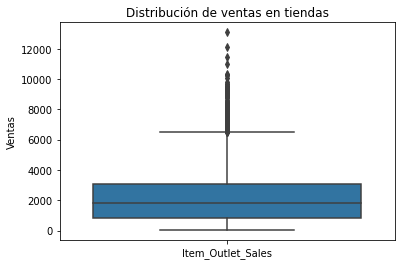

In [191]:
# Crear el gráfico de boxplot
sns.boxplot(data=df_sales[['Item_Outlet_Sales']])
plt.title('Distribución de ventas en tiendas')
plt.ylabel('Ventas')
plt.show()



In [192]:
df_sales['Item_Outlet_Sales'].describe().round(2)


count     8519.00
mean      2181.19
std       1706.51
min         33.29
25%        834.25
50%       1794.33
75%       3100.63
max      13086.96
Name: Item_Outlet_Sales, dtype: float64

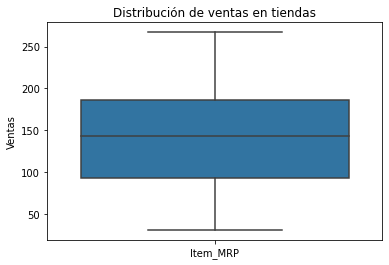

In [193]:
# Crear el gráfico de boxplot
sns.boxplot(data=df_sales[['Item_MRP']])
plt.title('Distribución de ventas en tiendas')
plt.ylabel('Ventas')
plt.show()

### 5.4  Análisis entre variables

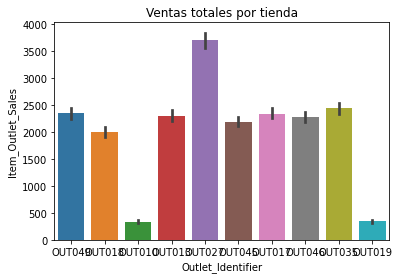

In [194]:
import seaborn as sns

sns.barplot(x="Outlet_Identifier", y="Item_Outlet_Sales", data=df_sales)
plt.title("Ventas totales por tienda")
plt.show()


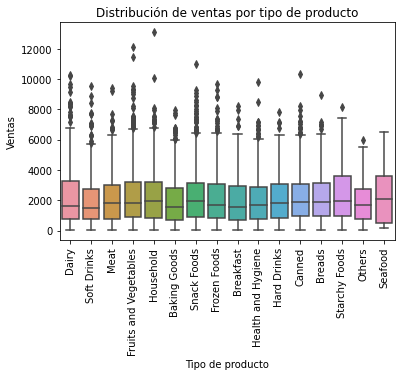

In [195]:
import seaborn as sns

sns.boxplot(x="Item_Type", y="Item_Outlet_Sales", data=df_sales)
plt.title("Distribución de ventas por tipo de producto")
plt.xlabel("Tipo de producto")
plt.ylabel("Ventas")
plt.xticks(rotation=90)
plt.show()
